<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`). Treat mountains as the positive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/module2-convolutional-neural-networks/data/train/mountain/art1131.jpg?raw=1)|![](https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/module2-convolutional-neural-networks/data/validation/forest/cdmc317.jpg?raw=1)|

The problem is relatively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several different possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`). Treat mountains as the positive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pre-trained layers from resnet
4. Report your model's accuracy

## Load in Data

This surprisingly more difficult than it seems, because you are working with directories of images instead of a single file. This boiler plate will help you download a zipped version of the directory of images. The directory is organized into "train" and "validation" which you can use inside an `ImageGenerator` class to stream batches of images thru your model.  


### Download & Summarize the Data

This step is completed for you. Just run the cells and review the results. 

In [1]:
import tensorflow as tf
import os

_URL = 'https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/module2-convolutional-neural-networks/data.zip?raw=true'

path_to_zip = tf.keras.utils.get_file('./data.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'data')

/Users/marianvinas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/marianvinas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/marianvinas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/marianvinas/opt/anaconda3/lib/python3.7/site-

In [2]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [3]:
train_mountain_dir = os.path.join(train_dir, 'mountain')  # directory with our training cat pictures
train_forest_dir = os.path.join(train_dir, 'forest')  # directory with our training dog pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  # directory with our validation cat pictures
validation_forest_dir = os.path.join(validation_dir, 'forest')  # directory with our validation dog pictures

In [4]:
num_mountain_tr = len(os.listdir(train_mountain_dir))
num_forest_tr = len(os.listdir(train_forest_dir))

num_mountain_val = len(os.listdir(validation_mountain_dir))
num_forest_val = len(os.listdir(validation_forest_dir))

total_train = num_mountain_tr + num_forest_tr
total_val = num_mountain_val + num_forest_val

In [5]:
print('total training mountain images:', num_mountain_tr)
print('total training forest images:', num_forest_tr)

print('total validation mountain images:', num_mountain_val)
print('total validation forest images:', num_forest_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training mountain images: 254
total training forest images: 270
total validation mountain images: 125
total validation forest images: 62
--
Total training images: 524
Total validation images: 187


### Keras `ImageGenerator` to Process the Data

This step is completed for you, but please review the code. The `ImageGenerator` class reads in batches of data from a directory and pass them to the model one batch at a time. Just like large text files, this method is advantageous, because it stifles the need to load a bunch of images into memory. 

Check out the documentation for this class method: [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class). You'll expand it's use in the third assignment objective.

In [6]:
batch_size = 16
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 533 images belonging to 2 classes.


In [9]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 195 images belonging to 2 classes.


## Instatiate Model

In [10]:
import numpy as np
 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

#Load the pretrained 
resnet = ResNet50(weights='imagenet', include_top=False)

/Users/marianvinas/opt/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [11]:
#freeze all the layers
for layer in resnet.layers:
    layer.trainable = False

In [12]:
x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      


## Fit Model

In [14]:

history = model.fit(train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/50
32/32 [==============================] - 69s 2s/step - loss: 0.3677 - acc: 0.9022 - val_loss: 0.6818 - val_acc: 0.6648
Epoch 2/50
32/32 [==============================] - 68s 2s/step - loss: 0.0483 - acc: 0.9820 - val_loss: 0.6678 - val_acc: 0.6648
Epoch 3/50
32/32 [==============================] - 66s 2s/step - loss: 0.0375 - acc: 0.9860 - val_loss: 0.6341 - val_acc: 0.6648
Epoch 4/50
32/32 [==============================] - 68s 2s/step - loss: 0.1200 - acc: 0.9668 - val_loss: 0.8215 - val_acc: 0.3466
Epoch 5/50
32/32 [==============================] - 66s 2s/step - loss: 0.0439 - acc: 0.9820 - val_loss: 0.6358 - val_acc: 0.6648
Epoch 6/50
32/32 [==============================] - 66s 2s/step - loss: 0.0418 - acc: 0.9837 - val_loss: 0.6502 - val_acc: 0.6648
Epoch 7/50
32/32 [==============================] - 67s 2s/step - loss: 0.0282 - acc: 0.9922 - val_loss: 0.6845 - val_acc: 0.6648
Epoch 8/50
32/32 [==============================] - 78s 2s/step - loss: 0.0327 - acc: 0.98

# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [15]:
# Define the Model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation


cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [16]:
# Compile Model
cnn.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [17]:
# Fit Model

cnn.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/50
32/32 [==============================] - 28s 863ms/step - loss: 0.6133 - acc: 0.8263 - val_loss: 0.3910 - val_acc: 0.8636
Epoch 2/50
32/32 [==============================] - 24s 760ms/step - loss: 0.1904 - acc: 0.9361 - val_loss: 0.3604 - val_acc: 0.8977
Epoch 3/50
32/32 [==============================] - 25s 769ms/step - loss: 0.1763 - acc: 0.9321 - val_loss: 0.4298 - val_acc: 0.8693
Epoch 4/50
32/32 [==============================] - 25s 792ms/step - loss: 0.1517 - acc: 0.9481 - val_loss: 0.2511 - val_acc: 0.9034
Epoch 5/50
32/32 [==============================] - 25s 776ms/step - loss: 0.0927 - acc: 0.9641 - val_loss: 0.1890 - val_acc: 0.9261
Epoch 6/50
32/32 [==============================] - 33s 1s/step - loss: 0.0992 - acc: 0.9541 - val_loss: 0.1311 - val_acc: 0.9375
Epoch 7/50
32/32 [==============================] - 27s 843ms/step - loss: 0.0794 - acc: 0.9609 - val_loss: 0.2584 - val_acc: 0.8977
Epoch 8/50
32/32 [==============================] - 23s 712ms/step - los

In [18]:
def identify_image(image):
    i = np.resize(np.array([image]), (1, 224, 224, 3)).astype('float32')
    
    pred = int(round(cnn.predict(i)[0,0]))
    
    if pred == 0:
        print("Forest")
    else:
        print("Mountain")

In [19]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt

mountains = imread_collection('data/train/mountain/*.jpg')
forests = imread_collection('data/train/forest/*.jpg')

Mountain
None


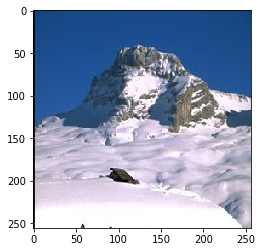

In [20]:
plt.imshow(mountains[0]);
print(identify_image(mountains[0]))

Forest
None


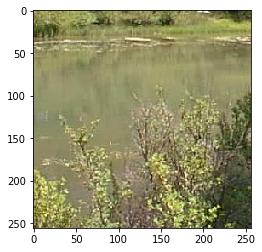

In [21]:
plt.imshow(forests[10]);
print(identify_image(forests[10]))

Forest
None


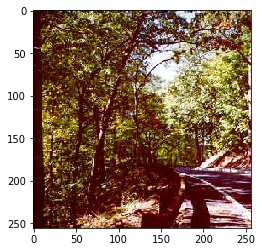

In [22]:
plt.imshow(forests[150]);
print(identify_image(forests[150]))

Forest
None


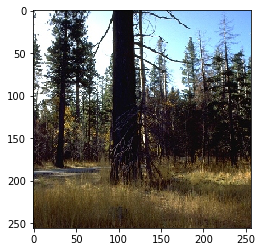

In [23]:
plt.imshow(forests[200]);
print(identify_image(forests[200]))

# Custom CNN Model with Image Manipulations

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Simply, you should be able to modify our image generator for the problem. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate two image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

# Define the batch size:
batch_size=32

# Define the train and validation generators: 
train_generator = train_datagen.flow_from_directory(
    directory='./data/train/',
    target_size=(224, 224),
    classes=['mountain','forest'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./data/validation/',
    target_size=(224, 224),
    classes=['mountain','forest'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 520 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


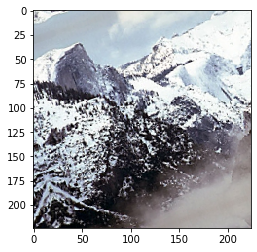

In [25]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][4]);

In [26]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                11944000  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [27]:
cnn_model = model.fit_generator(train_generator,
                                 epochs=5,
                                 validation_data=valid_generator)

Epoch 1/5
17/17 [==============================] - 35s 2s/step - loss: 1.4433 - acc: 0.6558 - val_loss: 0.4748 - val_acc: 0.8022
Epoch 2/5
17/17 [==============================] - 23s 1s/step - loss: 0.2878 - acc: 0.9000 - val_loss: 0.2037 - val_acc: 0.9176
Epoch 3/5
17/17 [==============================] - 23s 1s/step - loss: 0.2319 - acc: 0.9096 - val_loss: 0.2472 - val_acc: 0.8901
Epoch 4/5
17/17 [==============================] - 24s 1s/step - loss: 0.3317 - acc: 0.8846 - val_loss: 0.4318 - val_acc: 0.8022
Epoch 5/5
17/17 [==============================] - 23s 1s/step - loss: 0.2951 - acc: 0.8865 - val_loss: 0.2395 - val_acc: 0.9121


In [28]:
# transfer learning

from tensorflow.keras.applications.vgg19 import VGG19

# Load the pre-trained VVG19 Model
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224, 3),
              pooling=None)

# Freeze all the layers in the base VGGNet19 model
for layer in vgg19.layers:
    layer.trainable = False

In [29]:
from tensorflow.keras.layers import Dropout

# Instantiate the sequential model and add the VGG19 model
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)

# Add the custom layers atop the VGG19 model
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model for training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
from tensorflow.keras.applications.vgg19 import preprocess_input

# Instantiate two image generator classes
# - Add preprocess_input function for vgg19
# - Remove scaling since that will be done in the preprocess_input function
train_datagen = ImageDataGenerator(
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    data_format='channels_last')

# Define the train and validation generators 
train_generator = train_datagen.flow_from_directory(
    directory='./data/train/',
    target_size=(224, 224),
    classes=['mountain','forest'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./data/validation/',
    target_size=(224, 224),
    classes=['mountain','forest'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 520 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


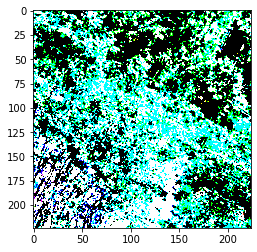

In [31]:
plt.imshow(train_generator[0][0][0]);


In [32]:

vgg_mountain = model.fit_generator(train_generator,
                                 epochs=5,
                                 validation_data=valid_generator)

Epoch 1/5
17/17 [==============================] - 239s 14s/step - loss: 1.0347 - acc: 0.9019 - val_loss: 1.1603 - val_acc: 0.9451
Epoch 2/5
17/17 [==============================] - 247s 15s/step - loss: 0.3841 - acc: 0.9712 - val_loss: 0.5441 - val_acc: 0.9670
Epoch 3/5
17/17 [==============================] - 229s 13s/step - loss: 0.1365 - acc: 0.9865 - val_loss: 0.8727 - val_acc: 0.9670
Epoch 4/5
17/17 [==============================] - 231s 14s/step - loss: 0.3471 - acc: 0.9808 - val_loss: 0.3162 - val_acc: 0.9835
Epoch 5/5
17/17 [==============================] - 266s 16s/step - loss: 0.2105 - acc: 0.9808 - val_loss: 1.3004 - val_acc: 0.9505


In [37]:
# pip install opencv-python
import cv2

img1 = cv2.imread('./mountain_1.jpg')
img2 = cv2.imread('./mountain_2.jpg')
print(img1.shape, img2.shape)


AttributeError: 'NoneType' object has no attribute 'shape'

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-ucld1hvm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


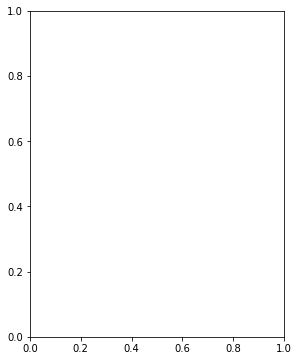

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off");

In [ ]:
import tensorflow as tf

img1_reshaped = tf.image.resize(img1, [224, 224])
img2_reshaped = tf.image.resize(img2, [224, 224])

train_generator.class_indices

In [ ]:
img1_final = tf.expand_dims(img1_reshaped, axis=0)
img2_final = tf.expand_dims(img2_reshaped, axis=0)

In [ ]:
model.predict(preprocess_input(img1_final), steps=1)


# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language